In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 

In [21]:
df1_train = pd.read_pickle("./df1_train.pkl")
df1_test  = pd.read_pickle("./df1_test.pkl")

df2_train = pd.read_pickle("./df2_train.pkl")
df2_test  = pd.read_pickle("./df2_test.pkl")
print(str(len(df1_train))+" "+str(len(df1_test))+" || "+str(len(df2_train))+" "+str(len(df2_test)))

2644 689 || 5605 1416


In [22]:
def run_knn(df_train, df_test):   
    X_train = df_train.iloc[:,:-1]
    y_train = df_train.iloc[:,-1:]
    X_test  = df_test.iloc[:,:-1]
    y_test  = df_test.iloc[:,-1:]
    
    #Feature Scaling
    scaler = StandardScaler()  
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)  
    
    #Training
    classifier = KNeighborsClassifier(n_neighbors=11)  
    classifier.fit(X_train, y_train) 
    
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)  
    cnf_matrix_train   = metrics.confusion_matrix(y_train, y_pred_train)
    cnf_matrix_test    = metrics.confusion_matrix(y_test , y_pred_test)
    cnf_matrix_train   = cnf_matrix_train/len(df_train)
    cnf_matrix_test    = cnf_matrix_test/len(df_test)
    
    class_names=[0,1]
    
    print("Confusion Matrix Training set")
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix_train), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    print("Confusion Matrix Test set")
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    print("=================On test set=================")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
    print("Precision:",metrics.precision_score(y_test, y_pred_test))
    print("Recall:",metrics.recall_score(y_test, y_pred_test))
    return
    

********************************** Data Frame 1 **********************************


D:\Software\SDE\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


Confusion Matrix Training set


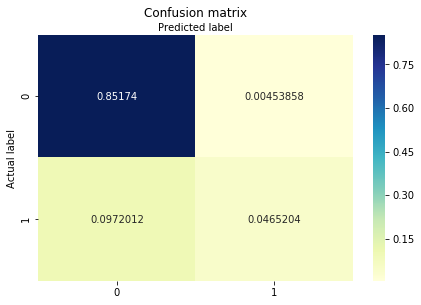

Confusion Matrix Test set


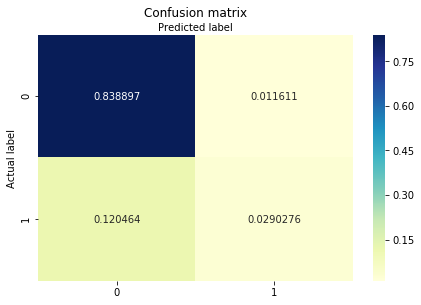

=================On test set=================
Accuracy: 0.8679245283018868
Precision: 0.7142857142857143
Recall: 0.1941747572815534
********************************** Data Frame 2 **********************************


D:\Software\SDE\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


Confusion Matrix Training set


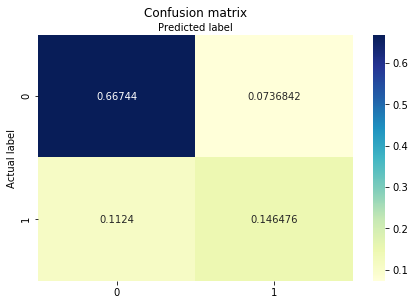

Confusion Matrix Test set


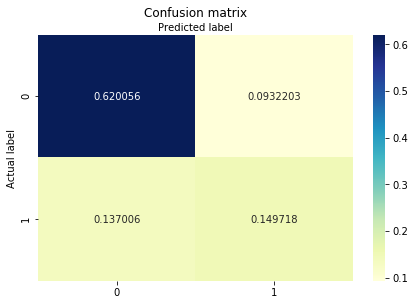

=================On test set=================
Accuracy: 0.769774011299435
Precision: 0.6162790697674418
Recall: 0.5221674876847291


In [23]:
print("********************************** Data Frame 1 **********************************")
run_knn(df1_train, df1_test)

print("********************************** Data Frame 2 **********************************")
run_knn(df2_train, df2_test)